In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from analysis import calculate_order_parameter,calculate_nearest_neighbour_distance

## Prepare the data


In [28]:
exp_file = "exp_n50_i15_o30_c05_s1_a05.csv"

In [29]:
df = pd.read_csv(exp_file)

Calculate the variables we want to analyse

In [30]:
order_df = calculate_order_parameter(df)


In [31]:

nnd_df = calculate_nearest_neighbour_distance(df)
print("calculated the neighbours")
time_groups = nnd_df.groupby('time')

calculated the neighbours


## Visulisations

Order parameter over time

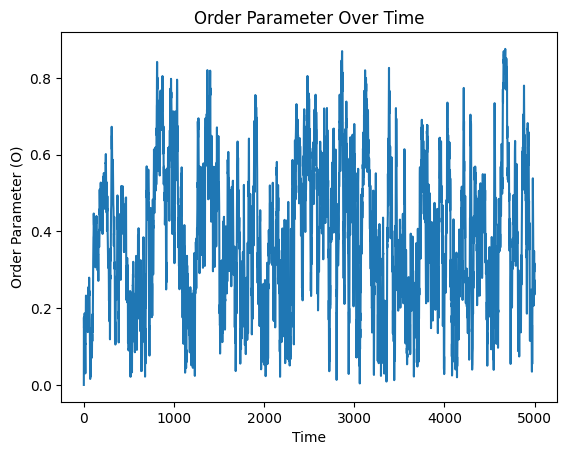

In [32]:
plt.plot(order_df['time'], order_df['O'])
plt.xlabel('Time')
plt.ylabel('Order Parameter (O)')
plt.title('Order Parameter Over Time')
plt.show()

### Statistics for nearest neighbours over time

In [33]:
mean_distances = time_groups['distance'].mean()
std_distances = time_groups['distance'].std()
min_distances = time_groups['distance'].min()
max_distances = time_groups['distance'].max()

Plot Time Series of Average Distance

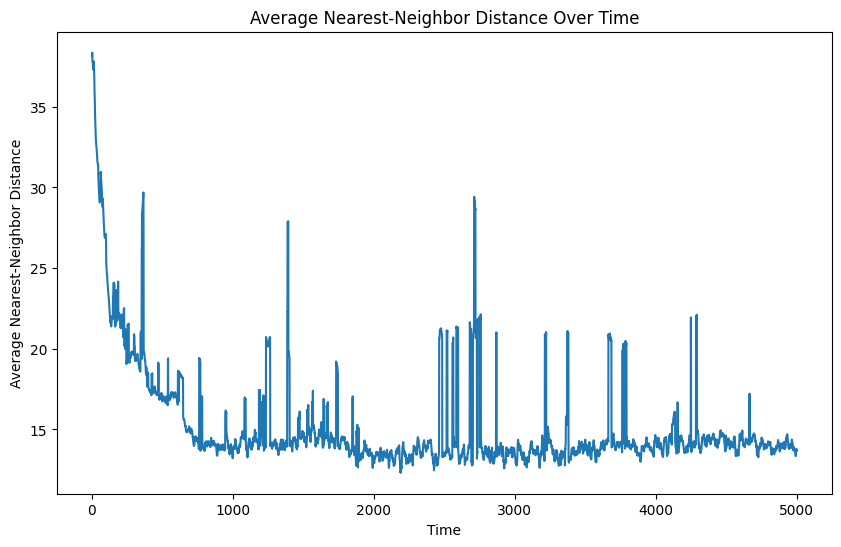

In [34]:
plt.figure(figsize=(10, 6))
mean_distances.plot()
plt.xlabel('Time')
plt.ylabel('Average Nearest-Neighbor Distance')
plt.title('Average Nearest-Neighbor Distance Over Time')
plt.show()

Heatmap of Nearest-Neighbor Distances

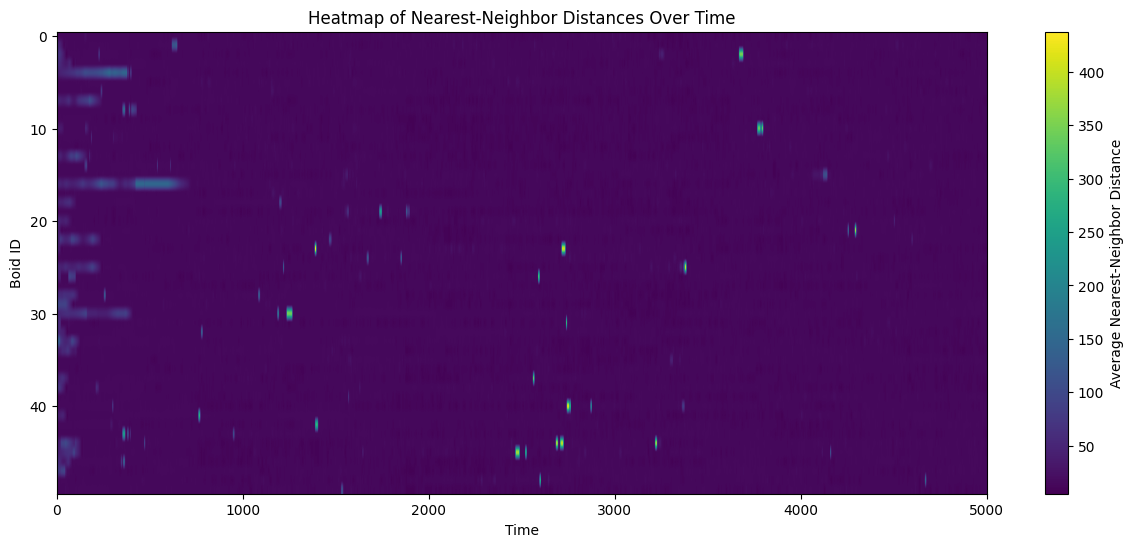

In [35]:
# Create a pivot table for visualization
pivot = nnd_df.pivot_table(index='id', columns='time', values='distance', aggfunc='mean')
plt.figure(figsize=(15, 6))
plt.imshow(pivot, cmap='viridis', aspect='auto')
plt.colorbar(label='Average Nearest-Neighbor Distance')
plt.xlabel('Time')
plt.ylabel('Boid ID')
plt.title('Heatmap of Nearest-Neighbor Distances Over Time')
plt.show()